In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.shape

(1067, 13)

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


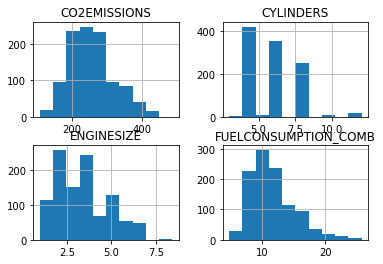

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

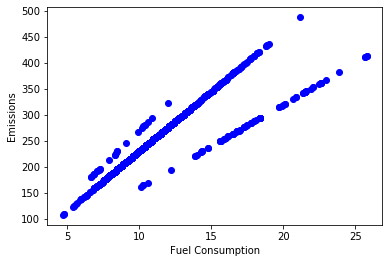

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')
plt.show()

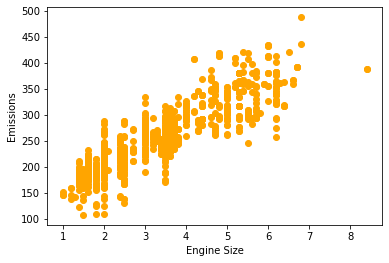

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'Orange')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

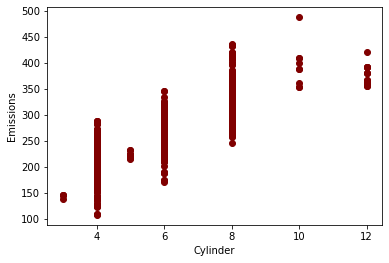

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'maroon')
plt.xlabel('Cylinder')
plt.ylabel('Emissions')
plt.show()

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<function matplotlib.pyplot.show(*args, **kw)>

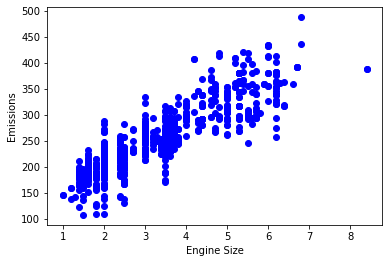

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show

# simple linear regression

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print('Coefficients:', regr.coef_)
print('Intercepts:', regr.intercept_)

Coefficients: [[38.93259748]]
Intercepts: [126.04097079]


Text(0, 0.5, 'Emission')

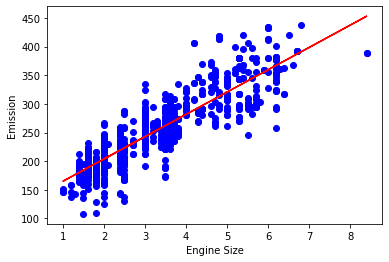

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0],'-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [26]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_yhat = regr.predict(test_x)
print ('Mean Absolute Error:%.2f' % np.mean(np.absolute(test_yhat-test_y)) )
print ('Residual sum of squares (MSE): %.2f' % np.mean((test_yhat - test_y) ** 2))
print ('R2-Score: %.2f' % r2_score(test_yhat, test_y))

Mean Absolute Error:24.02
Residual sum of squares (MSE): 1017.73
R2-Score: 0.67


# multiple linear regression

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print('Cofficients:', regr.coef_)

Cofficients: [[11.09313439  7.3363019   9.60941987]]


In [20]:
yhat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print ('Residual sum of squares: %.2f' % np.mean((yhat - y)**2))
print ('Variance score: %.2f' % regr.score(x,y))

Residual sum of squares: 502.15
Variance score: 0.87


In [22]:
cdf1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244


In [24]:
msk1 = np.random.rand(len(df)) < 0.8
train1 = cdf1[msk1]
test1 = cdf1[~msk1]

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train1[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.91041334  7.05549587  5.61857314  4.10702097]]


In [26]:
yhat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print ('Residual sum of squares: %.2f' % np.mean((yhat - y)**2))
print ('Variance score: %.2f' % regr.score(x,y))

Residual sum of squares: 593.10
Variance score: 0.87
